<a href="https://colab.research.google.com/github/talentrics/NWU_MSDS422_Assignments/blob/master/Assignment1_Exp_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MSDS 422 Assignment #1 - Exploratory Data Analysis

**by Daniel Macdonald @talentrics**

**Description**

This is the 1st assignment in NWU MSDS 422 - Practical Machine Learning

**text:** initial source code from Aurelien Geron 'Machine Learning with SciKit Learn' Ch. 2
https://github.com/ageron/handson-ml

**Topic:** Northwestern MSPA Software Survey
https://www.surveymonkey.com/r/MSPASoftware

**Data Source (shared csv files via Google Drive)**

> https://drive.google.com/open?id=1XSyTa76Q0jdZnSyb6lKGb6NwxIiocXLD

> https://drive.google.com/open?id=1VyIUNSC4eci5i-8GMXr_NFP01DDbozRm


**CoLab Shared Link - this notebook **

https://colab.research.google.com/drive/1NcEcIRRoJr5OViEFCDcQ-E9rQ1WNliJH

**GitHub Repository **

https://github.com/talentrics/NWU_MSDS422_Assignments

**Table of contents:**

*   System & Data Setup
*   Data Exploration & Visualization
*   Analysis of Correlation
*   Conclusion

## System & Data Setup

In [7]:
import os
os.getcwd()

'/content'

In [0]:
#install PyDrive to pull in csv data
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#download survey data from google drive
downloaded1 = drive.CreateFile({'id': '1XSyTa76Q0jdZnSyb6lKGb6NwxIiocXLD'})
downloaded1.GetContentFile('mspa-survey-data.csv')

In [0]:
#download course program summary from google drive
downloaded2 = drive.CreateFile({'id': '1VyIUNSC4eci5i-8GMXr_NFP01DDbozRm'})
downloaded2.GetContentFile('NWU_course_languages.csv')

In [0]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import io

In [0]:
# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [0]:
# read in comma-delimited text file, creating a pandas DataFrame object
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [28]:
valid_survey_input.shape

(207, 41)

In [9]:
valid_survey_input.head()

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [0]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [11]:
survey_df.head()

,RespondentID,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
0,5135740122,0,0,0,50,50,0,0,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5133300037,10,10,50,30,0,25,25,30,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
2,5132253300,20,0,40,40,0,0,0,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
3,5132096630,10,10,25,35,20,10,10,25,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
4,5131990362,20,0,0,70,10,20,0,0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


## Data Exploration & Visualization

In [60]:
# get list of all column titles:
survey_df.columns

Index(['RespondentID', 'My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS',
       'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java',
       'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course_Interest',
       'Foundations_DE_Course_Interest', 'Analytics_App_Course_Interest',
       'Systems_Analysis_Course_Interest', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date'],
      dtype='object')

In [0]:
# check data types of each column:
survey_df.dtypes;

### Exploration - Step 1: Software Preferences - Distribution & Correlation

In [13]:
survey_df.shape

(207, 41)

In [12]:
# get description of software preference columns
list1 = ['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS',
       'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java',
       'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS']
survey_df[list1].describe()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


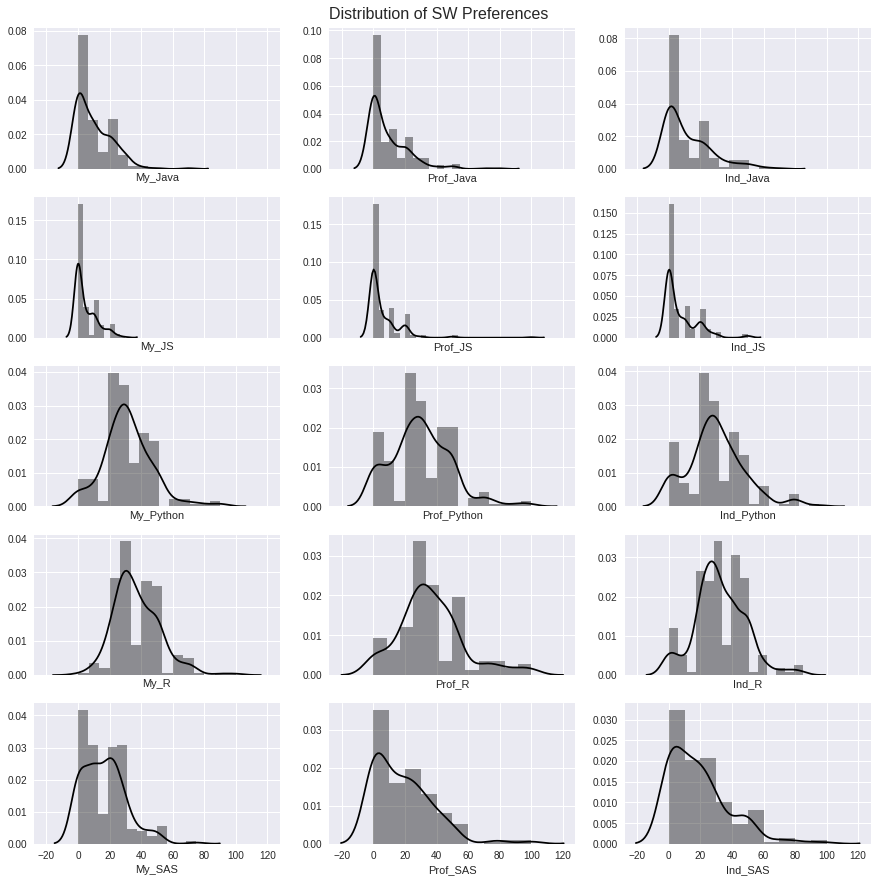

In [63]:
#plot distribution of SW preferences together in one figure
f, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)
f.suptitle('Distribution of SW Preferences', size = 16, y=.9)
sns.distplot(survey_df["My_Java"] , color="black", ax=axes[0, 0])
sns.distplot(survey_df["My_JS"] , color="black", ax=axes[1, 0])
sns.distplot(survey_df["My_Python"] , color="black", ax=axes[2, 0])
sns.distplot(survey_df["My_R"] , color="black", ax=axes[3, 0])
sns.distplot(survey_df["My_SAS"] , color="black", ax=axes[4, 0])
sns.distplot(survey_df["Prof_Java"] , color="black", ax=axes[0, 1])
sns.distplot(survey_df["Prof_JS"] , color="black", ax=axes[1, 1])
sns.distplot(survey_df["Prof_Python"] , color="black", ax=axes[2, 1])
sns.distplot(survey_df["Prof_R"] , color="black", ax=axes[3, 1])
sns.distplot(survey_df["Prof_SAS"] , color="black", ax=axes[4, 1])
sns.distplot(survey_df["Ind_Java"] , color="black", ax=axes[0, 2])
sns.distplot(survey_df["Ind_JS"] , color="black", ax=axes[1, 2])
sns.distplot(survey_df["Ind_Python"] , color="black", ax=axes[2, 2])
sns.distplot(survey_df["Ind_R"] , color="black", ax=axes[3, 2])
sns.distplot(survey_df["Ind_SAS"] , color="black", ax=axes[4, 2])
f.savefig('SW Preferences Distribution' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

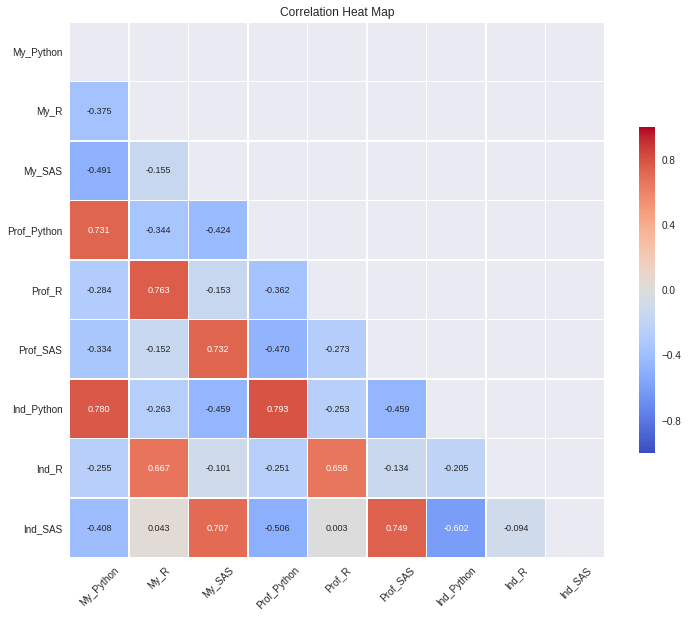

In [64]:
# define subset DataFrame for analysis of software preferences 
Selected = ['My_Python','My_R', 'My_SAS','Prof_Python','Prof_R', 'Prof_SAS', 'Ind_Python', 'Ind_R', 'Ind_SAS']
software_df = survey_df[Selected]

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df)  

### Exploration - Step 2: Course Interest - Distribution & Correlation

In [16]:
list2 = ['Python_Course_Interest', 'Foundations_DE_Course_Interest',\
         'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest']

survey_df[list2].describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


In [65]:
#step 1 - create backup version of survey_df for changes
survey_df2 = survey_df

# Explore distribution of course preferances starting with description by column
list2 = ['Python_Course_Interest', 'Foundations_DE_Course_Interest',\
         'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest']

#loop through list 2 (courses completed) and fill nan values with mean value
for i in list2:
    survey_df2[i] = survey_df2[i].fillna((survey_df2[i].mean()))

#check descrption of new columns
survey_df2[list2].describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,207.000000,207.000000,207.000000,207.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.762925,32.029613,33.814795,32.964722
min,0.000000,0.000000,0.000000,0.000000
25%,54.000000,30.000000,25.000000,25.000000
50%,82.000000,60.000000,55.201970,53.630000
75%,100.000000,85.000000,85.000000,80.000000
max,100.000000,100.000000,100.000000,100.000000


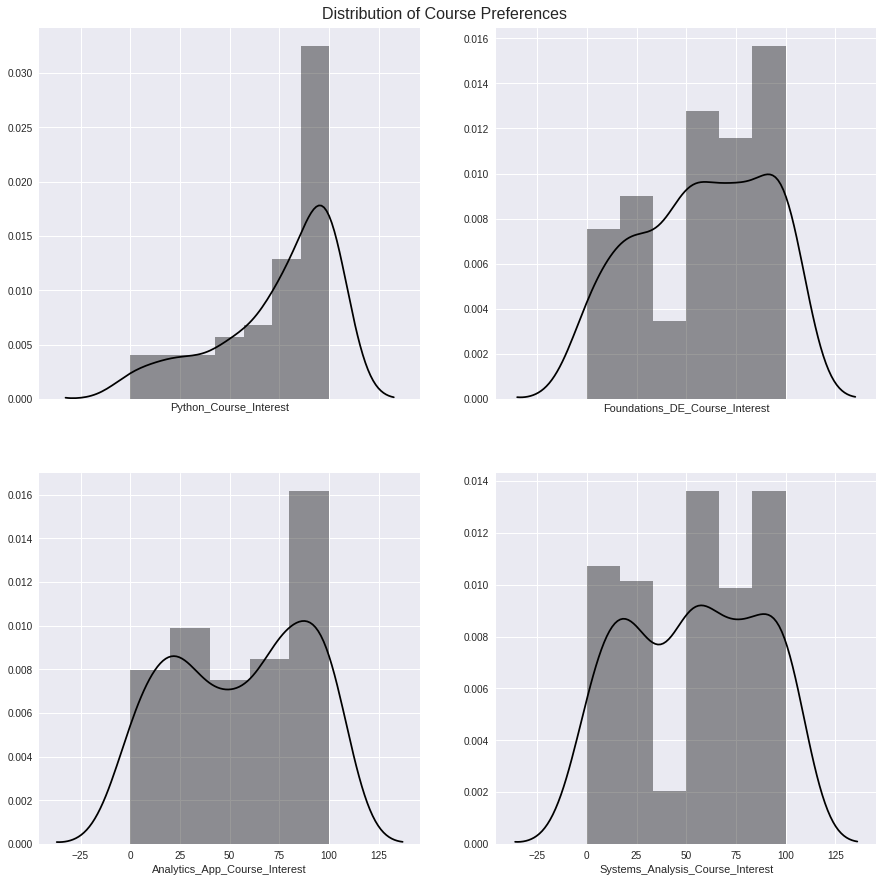

In [66]:
# Plot distribution of course preferances
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('Distribution of Course Preferences', size = 16, y=.9)
sns.distplot(survey_df2["Python_Course_Interest"] , color="black", ax=axes[0, 0])
sns.distplot(survey_df2["Foundations_DE_Course_Interest"] , color="black", ax=axes[0, 1])
sns.distplot(survey_df2["Analytics_App_Course_Interest"] , color="black", ax=axes[1, 0])
sns.distplot(survey_df2["Systems_Analysis_Course_Interest"] , color="black", ax=axes[1, 1])
f.savefig('Distribution of Course Preferences' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

### Exploration - Step 3: Courses completed - Distribution & Correlation

In [67]:
#create list of column titles related to courses completed:
list3 = ['PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other']
survey_df2[list3].describe()

,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other
count,163,171,145,113,59,127,48,17,7,13,11,5,30,6,4,5,14,2,26
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,24
top,PREDICT 400 Math for Modelers (Python),PREDICT 401 Introduction to Statistical Analys...,PREDICT 410 Regression and Multivariate Analys...,PREDICT 411 Generalized Linear Models (SAS),PREDICT 413 Time Series Analysis and Forecasti...,PREDICT 420 Database Systems and Data Preparat...,PREDICT 422 Practical Machine Learning (R),PREDICT 450 Marketing Analytics (R),PREDICT 451 Risk Analytics (R),PREDICT 452 Web Analytics and Network Data Sci...,PREDICT 453 Text Analytics (Python),PREDICT 454 Advanced Modeling Techniques (R),PREDICT 455 Data Visualization (R),PREDICT 456 Sports Performance Analytics (R),PREDICT 457 Sports Management Analytics (R),Other Course with Python as the Primary Language,Other Course with R as the Primary Language,Other Course with SAS as the Primary Language,PREDICT 402
freq,163,171,145,113,59,127,48,17,7,13,11,5,30,6,4,5,14,2,2


In [76]:
# read in csv created separately with software by course title
course_lang = pd.read_csv('NWU_course_languages.csv')
course_lang

,Course #,Software,Title,Core?
0,PREDICT400,Python,Math for Modelers,1
1,PREDICT401,R,Intro to Stats,1
2,PREDICT410,SAS,Regression_Linear,1
3,PREDICT411,SAS,Regression_nonL,1
4,PREDICT413,R,Time Series,0
5,PREDICT420,Python,Database_systems,1
6,PREDICT422,R,Practical ML,1
7,PREDICT450,R,Mktg_Analytics,0
8,PREDICT451,R,Risk Analytics,0
9,PREDICT452,Python,Web_Analytics,0


In [77]:
#create new DataFrame
survey_df3 = survey_df2

#loop through course completed columns and replace values with title
for x in list3:
    
    survey_df3[x].loc[~survey_df2[x].isnull()] = x

#check new df as related to courses completed
survey_df3[list3].describe()

,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other
count,163,171,145,113,59,127,48,17,7,13,11,5,30,6,4,5,14,2,26
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,PREDICT400,PREDICT401,PREDICT410,PREDICT411,PREDICT413,PREDICT420,PREDICT422,PREDICT450,PREDICT451,PREDICT452,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other
freq,163,171,145,113,59,127,48,17,7,13,11,5,30,6,4,5,14,2,26


In [0]:
# create table of value counts of columns 

#step 1 - create blank dataframe
df_counts = pd.DataFrame()

#Loop through list 3 to count values:
for x in list3:
    
    df_temp = survey_df2[x].value_counts()
    df_temp = pd.DataFrame(df_temp) #creates temp dataframe
    df_temp.rename(columns = {df_temp.columns[0]: 'Count'}, inplace = True) #renames column 0
    df_counts = df_counts.append(df_temp, ignore_index = False) #appends temp df to df_counts

# add numeric index, rename old index and sort by count
df_counts = df_counts.reset_index()
df_counts = df_counts.rename(columns = {'index':'Course_Title'})
df_counts = df_counts.sort_values('Count', ascending = False).reset_index(drop=True)
df_counts;

In [79]:
#merge both dataframes (response counts by courses completed & course software)
df_new = df_counts.merge(course_lang, left_on='Course_Title', right_on='Course #', how='outer')
df_new = df_new.drop(['Course #'], axis = 1)
df_new

,Course_Title,Count,Software,Title,Core?
0,PREDICT401,171,R,Intro to Stats,1
1,PREDICT400,163,Python,Math for Modelers,1
2,PREDICT410,145,SAS,Regression_Linear,1
3,PREDICT420,127,Python,Database_systems,1
4,PREDICT411,113,SAS,Regression_nonL,1
5,PREDICT413,59,R,Time Series,0
6,PREDICT422,48,R,Practical ML,1
7,PREDICT455,30,R,Data_visualization,0
8,Other,26,NaN,Other,0
9,PREDICT450,17,R,Mktg_Analytics,0


In [80]:
df_sum = df_new.groupby('Software')
df_sum.sum()

,Count,Core?
Software,,
Python,319,2
R,361,2
SAS,260,2


### Exploration Step 4 - remaining fields (Courses Completed & Date of Graduation)

In [81]:
survey_df3['Courses_Completed'] = survey_df3['Courses_Completed'].fillna(0)
survey_df3['Courses_Completed'].describe()

count    207.000000
mean       5.729469
std        3.550503
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64

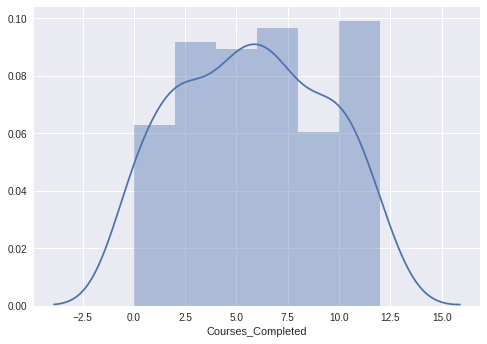

In [82]:
fig = sns.distplot(survey_df3['Courses_Completed'])

In [83]:
survey_df3['Graduate_Date'].value_counts()

Spring 2018      30
Winter 2018      25
Winter 2017      25
Fall 2018        20
Spring 2017      19
Fall 2017        14
Summer 2017      14
Fall 2016        13
Winter 2019      11
Summer 2018      11
Spring 2019       9
2020 or Later     5
Fall 2019         5
Summer 2019       3
Name: Graduate_Date, dtype: int64

## Analysis of Correlation

### Personal Interest in Python vs. perception of industry requirement & curriculum

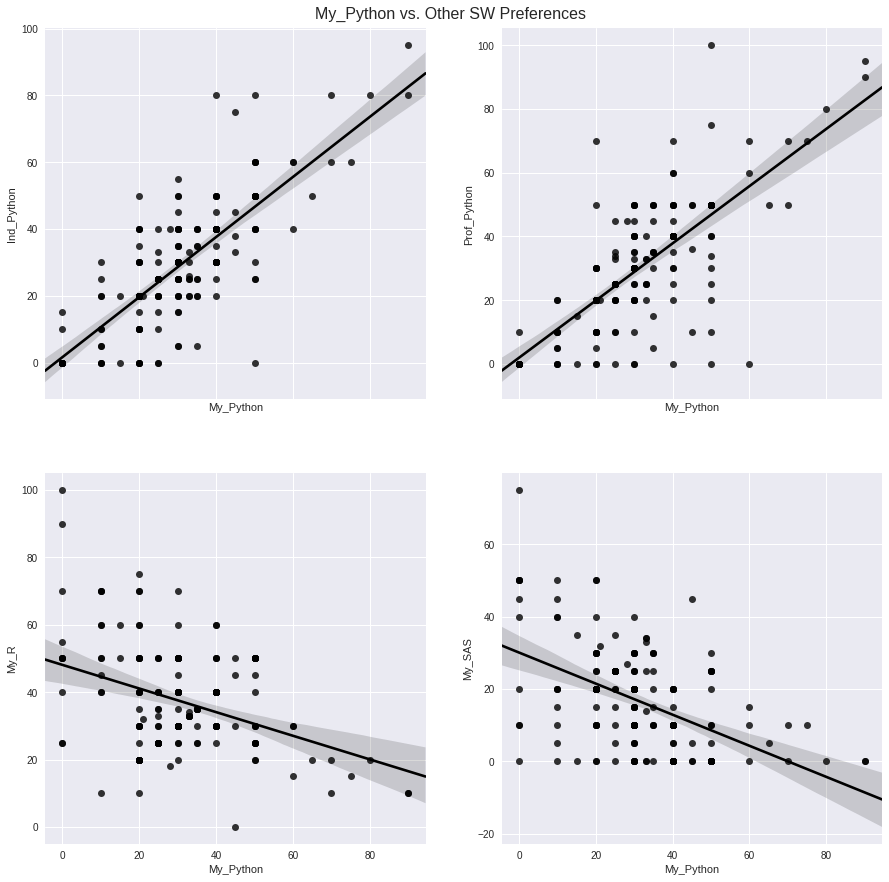

In [84]:
#plot of 'My_Python' (Personal Interest) vs. Perceived Industry requirements
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('My_Python vs. Other SW Preferences', size = 16, y=.9)
sns.regplot(x="My_Python", y="Ind_Python", data=survey_df2, color="black", ax=axes[0, 0])
sns.regplot(x="My_Python", y="Prof_Python", data=survey_df2, color="black", ax=axes[0, 1])
sns.regplot(x="My_Python", y="My_R", data=survey_df2, color="black", ax=axes[1, 0])
sns.regplot(x="My_Python", y="My_SAS", data=survey_df2, color="black", ax=axes[1, 1])
f.savefig('My_Python_regplot' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

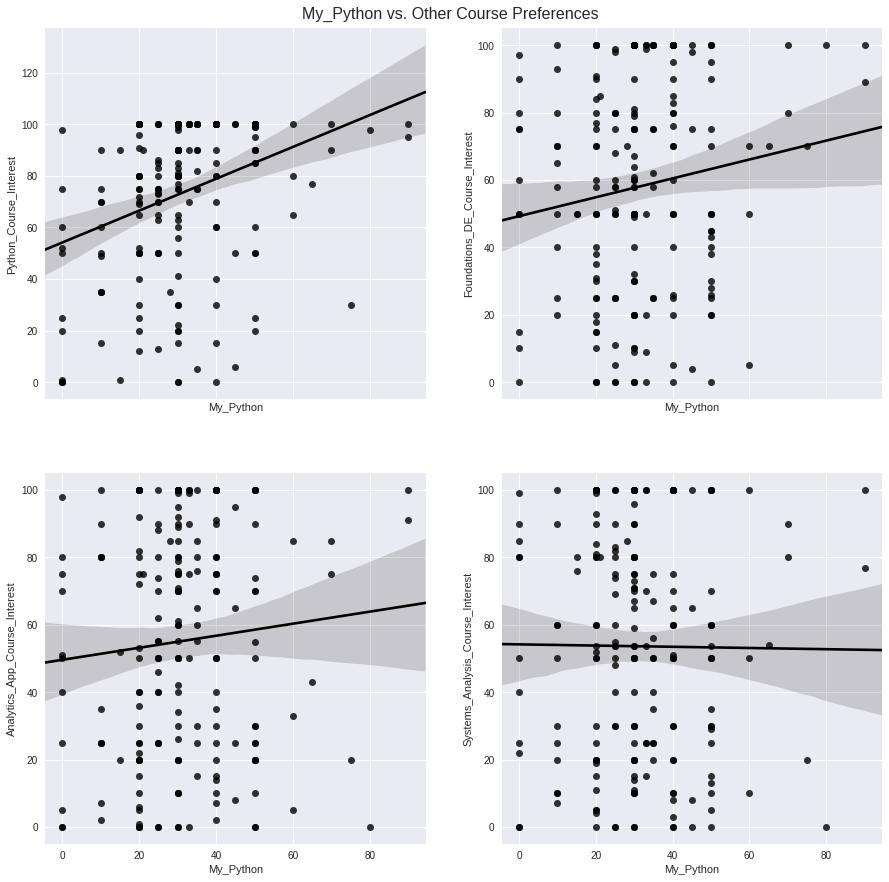

In [85]:
#plot of 'My_Python' personal interest against interest in curriculum types
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('My_Python vs. Other Course Preferences', size = 16, y=.9)
sns.regplot(x="My_Python", y="Python_Course_Interest", data=survey_df2, color="black", ax=axes[0, 0])
sns.regplot(x="My_Python", y="Foundations_DE_Course_Interest", data=survey_df2, color="black", ax=axes[0, 1])
sns.regplot(x="My_Python", y="Analytics_App_Course_Interest", data=survey_df2, color="black", ax=axes[1, 0])
sns.regplot(x="My_Python", y="Systems_Analysis_Course_Interest", data=survey_df2, color="black", ax=axes[1, 1])
f.savefig('My_Python_regplot2' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

### Personal Interest in R vs. perception of industry requirement & curriculum

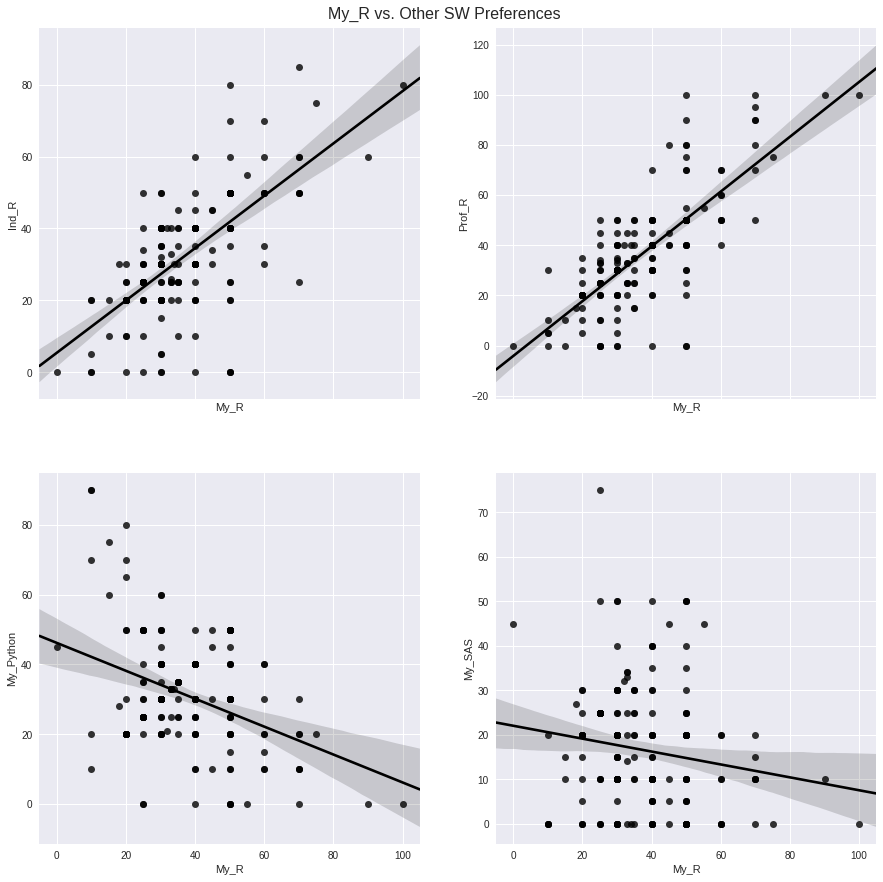

In [86]:
#plot of 'My_R' (Personal Interest) vs. Perceived Industry requirements
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('My_R vs. Other SW Preferences', size = 16, y=.9)
sns.regplot(x="My_R", y="Ind_R", data=survey_df2, color="black", ax=axes[0, 0])
sns.regplot(x="My_R", y="Prof_R", data=survey_df2, color="black", ax=axes[0, 1])
sns.regplot(x="My_R", y="My_Python", data=survey_df2, color="black", ax=axes[1, 0])
sns.regplot(x="My_R", y="My_SAS", data=survey_df2, color="black", ax=axes[1, 1])
f.savefig('My_R_regplot' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

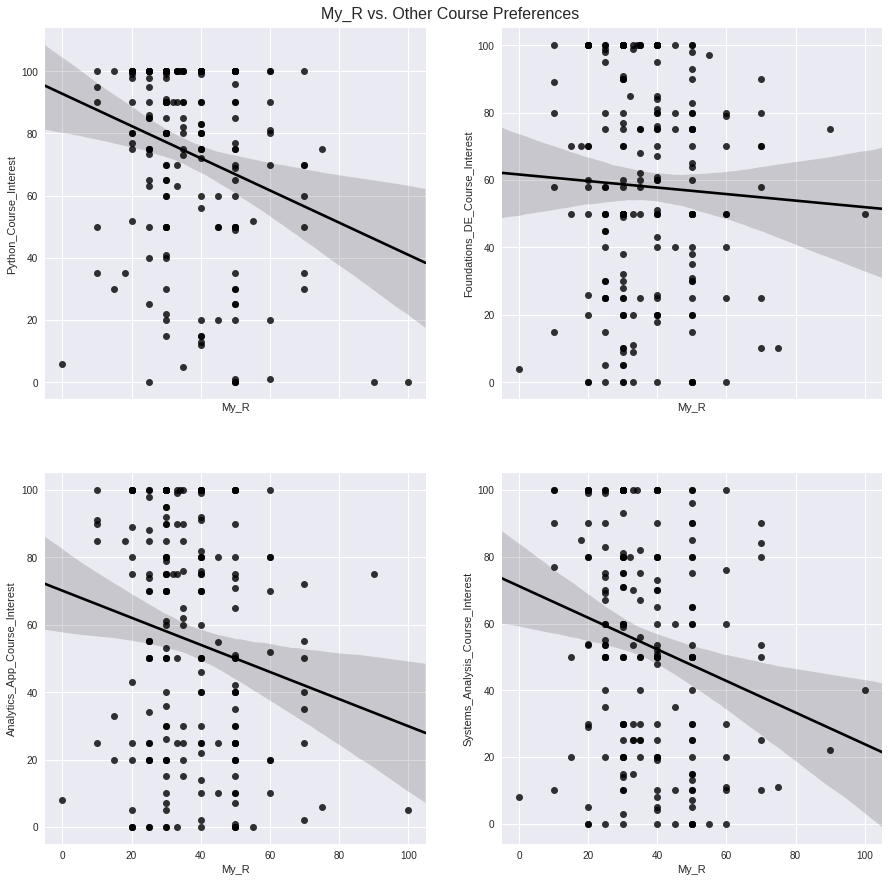

In [87]:
#plot of 'My_R' personal interest against interest in curriculum types
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('My_R vs. Other Course Preferences', size = 16, y=.9)
sns.regplot(x="My_R", y="Python_Course_Interest", data=survey_df2, color="black", ax=axes[0, 0])
sns.regplot(x="My_R", y="Foundations_DE_Course_Interest", data=survey_df2, color="black", ax=axes[0, 1])
sns.regplot(x="My_R", y="Analytics_App_Course_Interest", data=survey_df2, color="black", ax=axes[1, 0])
sns.regplot(x="My_R", y="Systems_Analysis_Course_Interest", data=survey_df2, color="black", ax=axes[1, 1])
f.savefig('My_R_regplot2' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

### Personal Interest in SAS vs. perception of industry requirement & curriculum

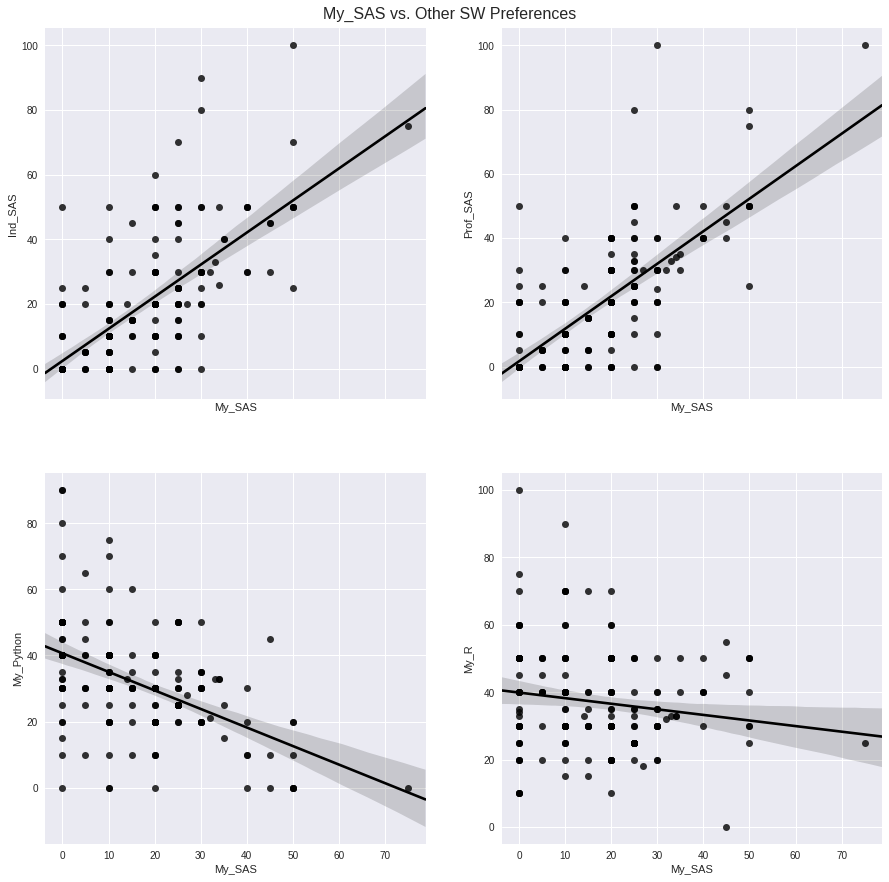

In [88]:
#plot of 'My_SAS' (Personal Interest) vs. Perceived Industry requirements
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('My_SAS vs. Other SW Preferences', size = 16, y=.9)
sns.regplot(x="My_SAS", y="Ind_SAS", data=survey_df2, color="black", ax=axes[0, 0])
sns.regplot(x="My_SAS", y="Prof_SAS", data=survey_df2, color="black", ax=axes[0, 1])
sns.regplot(x="My_SAS", y="My_Python", data=survey_df2, color="black", ax=axes[1, 0])
sns.regplot(x="My_SAS", y="My_R", data=survey_df2, color="black", ax=axes[1, 1])
f.savefig('My_SAS_regplot' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

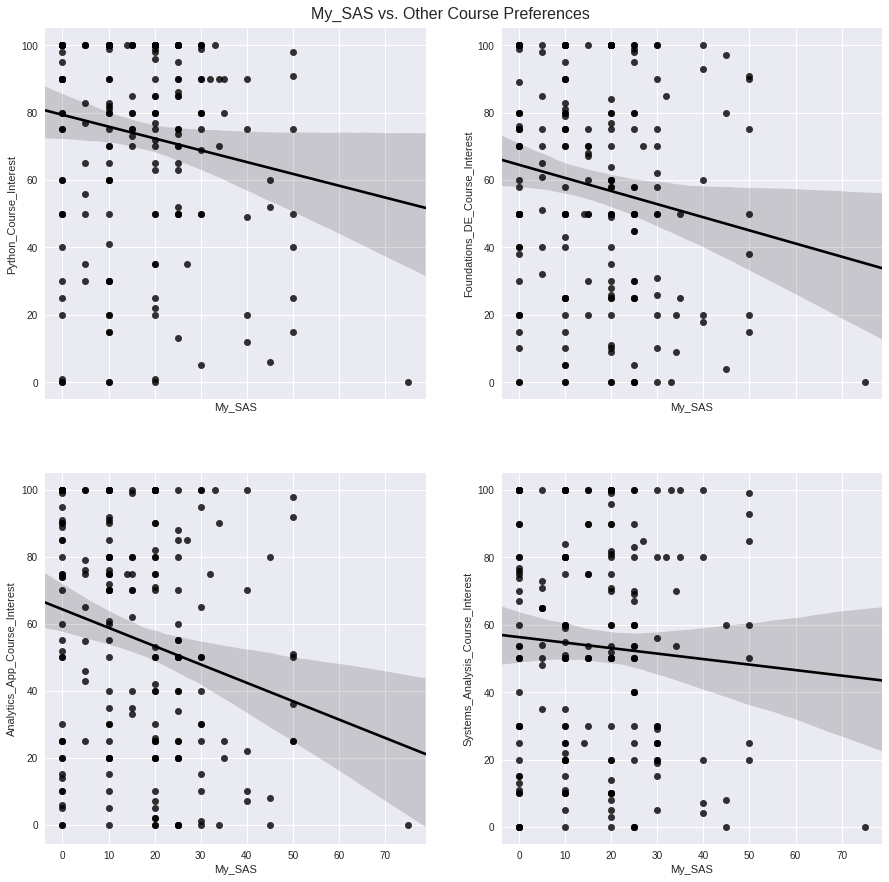

In [89]:
#plot of 'My_SAS' personal interest against interest in curriculum types
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
f.suptitle('My_SAS vs. Other Course Preferences', size = 16, y=.9)
sns.regplot(x="My_SAS", y="Python_Course_Interest", data=survey_df2, color="black", ax=axes[0, 0])
sns.regplot(x="My_SAS", y="Foundations_DE_Course_Interest", data=survey_df2, color="black", ax=axes[0, 1])
sns.regplot(x="My_SAS", y="Analytics_App_Course_Interest", data=survey_df2, color="black", ax=axes[1, 0])
sns.regplot(x="My_SAS", y="Systems_Analysis_Course_Interest", data=survey_df2, color="black", ax=axes[1, 1])
f.savefig('My_SAS_regplot2' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

### 'My_Python' Variable Transformation using Scikit Learn

In [0]:
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [92]:
# transformations a la Scikit Learn
# My_Python Variable transformation -'0' values to '1'
My_py = pd.DataFrame(survey_df['My_Python'])
My_py = My_py.replace(0,1)
My_py.describe()

,My_Python
count,207.000000
mean,31.357488
std,15.464891
min,1.000000
25%,20.000000
50%,30.000000
75%,40.000000
max,90.000000


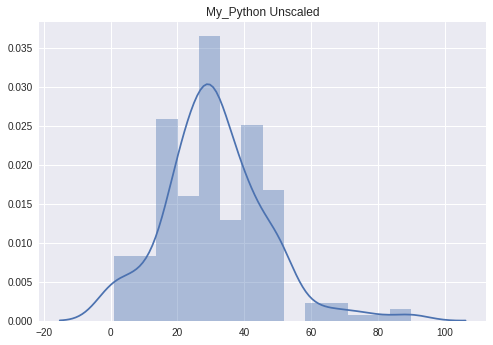

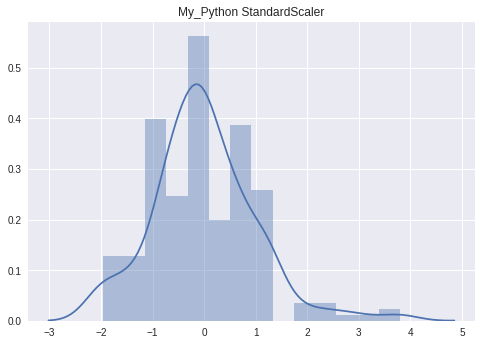

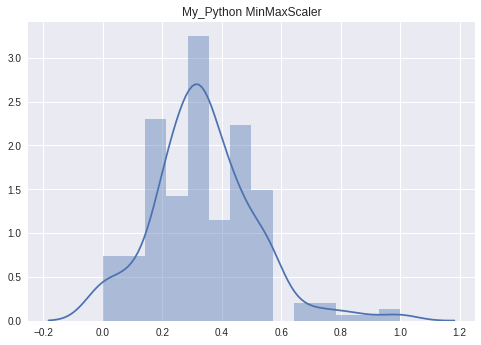

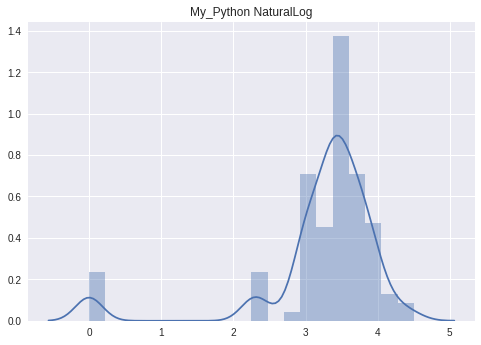

In [93]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html
X = My_py

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('My_Python Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('My_Python StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('My_Python MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('My_Python NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

## Conclusion

The initial review of the data suggests that there is a strong preference for using Python as the primary data science
tool. This appears to be a student preference, but it is also supported by the evidence that students perceive a strong demand
for these skills in the market. As we consider the current applied tooling that is emphasized by the MSPA curriculum, there is an
equal balance across Python, R, and SAS – with the elective courses such as Marketing (450), Sports Analytics (456/457), Data
Visualization (455), and Time Series Forecasting (413) placing the ‘specialty’ emphasis on R as the tool of choice.